In [1]:
using OrdinaryDiffEq
using CairoMakie

In [ ]:
function σ(t)
    return cos(500 * t)
end

function ζ(t)
    return (1 + sin(500 * t))/2
end

function u(x, y, t, params)
    return @. 0.5 * x * σ(t) - 0.5 * y * ζ(t)
end

function v(x, y, t, params)
    return @. 0.5 * x * ζ(t) - 0.5 * y * σ(t)
end

function ∂u∂x(x, y, t, params)
    return @. 0.5 * σ(t)
end

function ∂u∂y(x, y, t, params)
    return @. -0.5 * ζ(t)
end

function ∂v∂x(x, y, t, params)
    return @. 0.5 * ζ(t)
end

function ∂v∂y(x, y, t, params)
    return @. -0.5 * σ(t)
end

In [153]:
function g_env(x, y, σ)
    return exp(-(x^2 + y^2)/(2*σ))
end

function dxg_env(x, y, σ)
    return exp(-(x^2 + y^2)/(2*σ)) * (-x/σ)
end

function u(x, y, t, params)
    #return @. params.U * y * (cos(params.α * t))
    #return @. params.U * (y * g_env(x, y, params.σ) + 1)* cos(params.α * t)
    return @. params.U * cos(x) * sin(y) * (cos(params.α * t) + params.b)
end

function v(x, y, t, params)
    #return @. params.U * x * (cos(params.α * t))
    #return @. params.U * (x * g_env(x, y, params.σ) + 1)* cos(params.α * t)
    return @. -params.U * sin(x) * cos(y) * (cos(params.α * t) + params.b)
end

function ∂u∂x(x, y, t, params)
    #return @. params.U * y * dxg_env(x, y, params.σ) * cos(params.α * t)
    return @. -params.U * sin(x) * sin(y) * (cos(params.α * t) + params.b)
end

function ∂u∂y(x, y, t, params)
    #return @. params.U * (cos(params.α * t))
    #return @. (params.U * y * dxg_env(y, x, params.σ) + params.U * g_env(x, y, params.σ)) * cos(params.α * t)
    return @. params.U * cos(x) * cos(y) * (cos(params.α * t) + params.b)
end

function ∂v∂x(x, y, t, params)
    #return @. params.U * (cos(params.α * t))
    #return @. (params.U * x * dxg_env(x, y, params.σ) + params.U * g_env(x, y, params.σ)) * cos(params.α * t)
    return @. -params.U * cos(x) * cos(y) * (cos(params.α * t) + params.b)
end

function ∂v∂y(x, y, t, params)
    #return @. params.U * x * dxg_env(y, x, params.σ) * cos(params.α * t)
    return @. params.U * sin(x) * sin(y) * (cos(params.α * t) + params.b)
end

∂v∂y (generic function with 1 method)

In [158]:
function dispersion_relation(k1, k2, params)
    return @. params.c * sqrt(params.f^2 + k1^2 + k2^2)
end

function dxkdt!(dxk, xk, p, t)

    x = @views xk[:, 1]
    y = @views xk[:, 2]
    k = @views xk[:, 3]
    l = @views xk[:, 4]

    ω = dispersion_relation(k, l, p)
    Cg_x = @. p.c * k / sqrt(p.f^2 + p.c * (k^2 + l^2))
    Cg_y = @. p.c * l / sqrt(p.f^2 + p.c * (k^2 + l^2))

    dx = @views dxk[:, 1]
    dy = @views dxk[:, 2]
    dk = @views dxk[:, 3]
    dl = @views dxk[:, 4]

    u_packet = u(x, y, t, p)
    v_packet = v(x, y, t, p)
    ux = ∂u∂x(x, y, t, p)
    uy = ∂u∂y(x, y, t, p)
    vx = ∂v∂x(x, y, t, p)
    vy = ∂v∂y(x, y, t, p)
    
    dx .= u_packet + Cg_x
    dy .= v_packet + Cg_y
    dk .= @. -ux * k - vx * l
    dl .= @. -uy * k - vy * l
end

dxkdt! (generic function with 1 method)

In [193]:
u0 = [0.0 0.0 2.4 0.2; 
      0.0 0.0 2.5 0.1;
      0.0 0.0 2.6 0.0;]
U = 0.3
c = 1.0
α = 0.3
b = 0.2
f = 3.0
ode_params = (c = c, U = U, α=α, b=b, f=f)
prob = ODEProblem(dxkdt!, u0, (0.0f0, 4000.0f0), ode_params)

sol = solve(prob, Vern6(), reltol = 1e-6, abstol = 1e-6, saveat = 0.05)

retcode: Success
Interpolation: 1st order linear
t: 80001-element Vector{Float32}:
    0.0
    0.05
    0.1
    0.15
    0.2
    0.25
    0.3
    0.35
    0.4
    0.45
    0.5
    0.55
    0.6
    ⋮
 3999.45
 3999.5
 3999.55
 3999.6
 3999.65
 3999.7
 3999.75
 3999.8
 3999.85
 3999.9
 3999.95
 4000.0
u: 80001-element Vector{Matrix{Float64}}:
 [0.0 0.0 2.4 0.2; 0.0 0.0 2.5 0.1; 0.0 0.0 2.6 0.0]
 [0.031234241601013384 0.002037583479672012 2.4032114468889665 0.15677827656039028; 0.032016581561016624 0.0007038630368068766 2.50139512078422 0.05499532113882137; 0.03274122276409639 -0.0005893345495293924 2.5995787625038935 -0.04678764945669011]
 [0.06253166150244939 0.0029510225178364866 2.4056465604861788 0.11355601941459298; 0.06404812547475058 0.0002559046630881555 2.5019807041889193 0.010027414638717593; 0.06545067250112625 -0.002356104071711978 2.5983146028700412 -0.09350132672898656]
 [0.09386185803535868 0.0027411681515535974 2.4073059939462884 0.07039785748446471; 0.09606362690280475 -

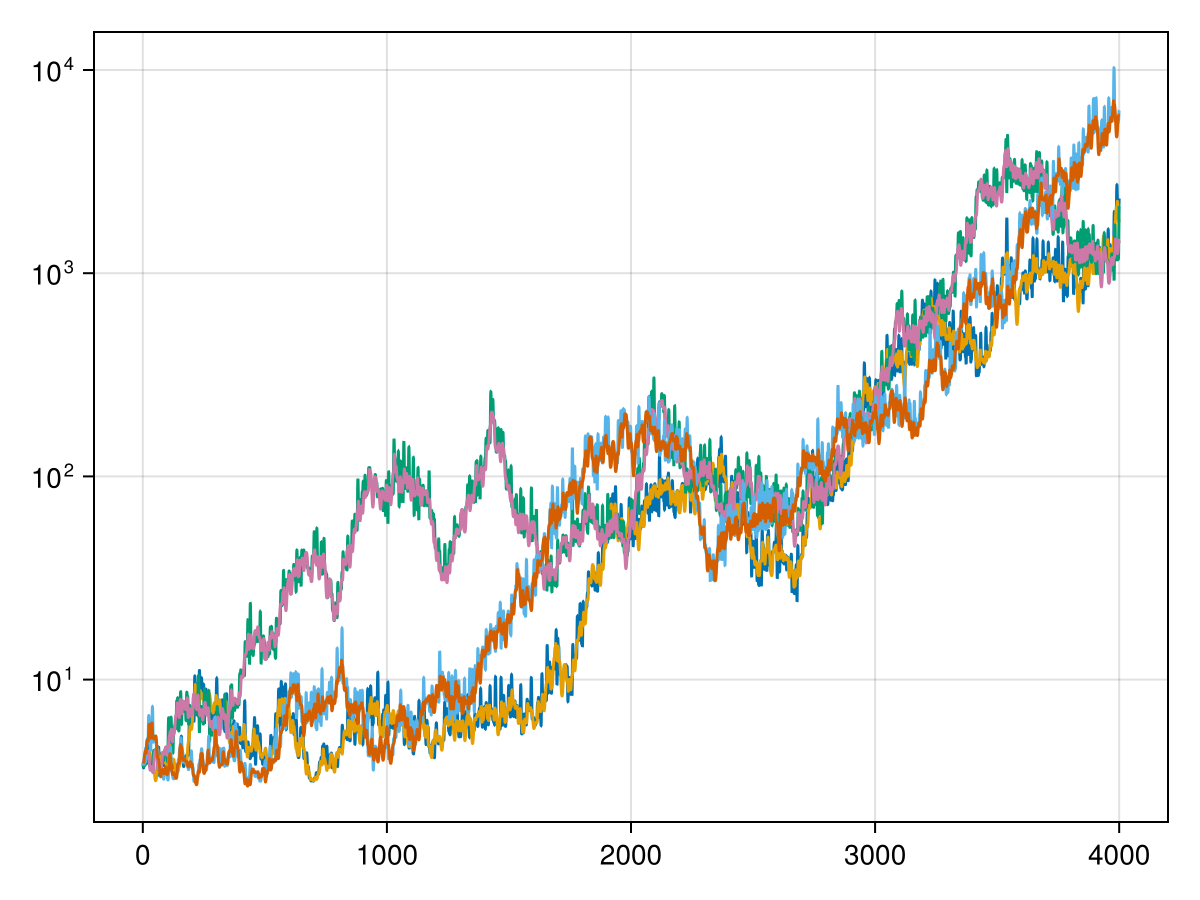

In [197]:
f = Figure()
ax = Axis(f[1,1]; yscale=log10)
# l(t) component
#lines!(ax, sol.t, sol[4,:])
#lines!(sol.t, -U*sin.(α * sol.t)/α)
#pred_y = @. c/α * (asin(U*cos(α*sol.t)/(sqrt(α^2+U^2))) - asin(U/(sqrt(α^2+U^2))))
x_sol = sol[:,1,:]'
y_sol = sol[:,2,:]'
k_sol = sol[:,3,:]'
l_sol = sol[:,4,:]'
t_sol = sol.t
u_sol = u.(x_sol, y_sol, t_sol, Ref(ode_params))
v_sol = v.(x_sol, y_sol, t_sol, Ref(ode_params))
ω_sol = dispersion_relation.(k_sol, l_sol, Ref(ode_params))
doppler_shift = u_sol .* k_sol + v_sol .* l_sol

for i=1:3
    lines!(ax, sol.t, ω_sol[:,i])
    lines!(ax, sol.t, (ω_sol + doppler_shift)[:,i])
end
#lines!(ax, sol.t, doppler_shift)
#lines!(ax, sol.t, sol[3,:].^2 + sol[4,:].^2)
#lines!(ax, sol.t, sol[1,:])
f